In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [5]:
path = kagglehub.dataset_download("dileep070/heart-disease-prediction-using-logistic-regression")

print("Path to dataset files:", path)
print(os.listdir(path))

Path to dataset files: /kaggle/input/heart-disease-prediction-using-logistic-regression
['framingham.csv', '.nfs000000003df4fd8f00000053']


In [6]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/dileep070/heart-disease-prediction-using-logistic-regression/versions/1/framingham.csv')

In [7]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [9]:
df.dtypes

,0
male,int64
age,int64
education,float64
currentSmoker,int64
cigsPerDay,float64
BPMeds,float64
prevalentStroke,int64
prevalentHyp,int64
diabetes,int64
totChol,float64


In [10]:
df.shape

(4238, 16)

In [11]:
df['education'] = df['education'].fillna(df['education'].mean())

In [12]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())

In [13]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mean())

In [14]:
df['totChol'] = df['totChol'].fillna(df['totChol'].mean())

In [15]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [16]:
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())

In [17]:
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())

In [18]:
df.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
x = df.drop(['TenYearCHD'],axis=1)

In [21]:
y = df['TenYearCHD']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
df['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3594
1,644


In [25]:
lg = LogisticRegression()

In [26]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
pred1 = lg.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [29]:
accuracy_score(y_test,pred1)

0.8325471698113207

In [30]:
cm = confusion_matrix(y_test,pred1)

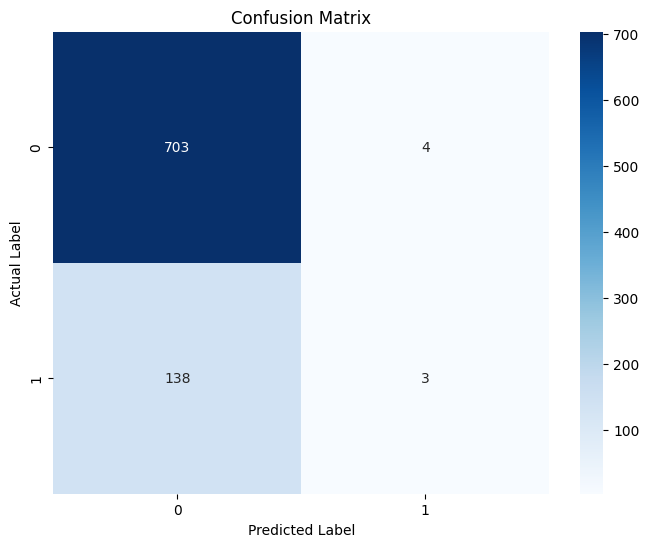

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [32]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

In [33]:

param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': stats.loguniform(1e-3, 1e2),   # random continuous sampling
    'solver': ['liblinear', 'saga'],
    'max_iter': [500],
    'class_weight': ['balanced', None],
    'l1_ratio': [0.1, 0.5, 0.9]  # only matters if elasticnet
}

reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_dist,
    n_iter=30,   # number of random samples
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

reg.fit(x_train, y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x795f6274a1b0>,
                                        'class_weight': ['balanced', None],
                                        'l1_ratio': [0.1, 0.5, 0.9],
                                        'max_iter': [500],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, verbose=1)

In [34]:
reg.best_score_

np.float64(0.8533923303834807)

In [35]:
reg.best_params_

{'C': np.float64(0.0019517224641449498),
 'class_weight': None,
 'l1_ratio': 0.1,
 'max_iter': 500,
 'penalty': 'elasticnet',
 'solver': 'saga'}

<h1> Lets drop Unncessary columns </h1>

In [36]:
df.shape

(4238, 16)

In [37]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10)  # choose top 10 features
X_new = selector.fit_transform(x, y)

print("Selected Features Indexes:", selector.get_support(indices=True))
selected_indexes = selector.get_support(indices=True)

Selected Features Indexes: [ 0  1  4  5  7  8  9 10 11 14]


In [38]:
x_selected = x.iloc[:, selected_indexes]
print("Final Columns Shape:", x_selected.shape)

Final Columns Shape: (4238, 10)


In [39]:
x_train,x_test,y_train,y_test = train_test_split(x_selected,y,test_size=0.2,random_state=2)

In [40]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
pred2 = lg.predict(x_test)

In [42]:
accuracy_score(y_test,pred2) #slight better

0.8337264150943396

In [43]:
#cmm = confusion_matrix(y_test,pree)

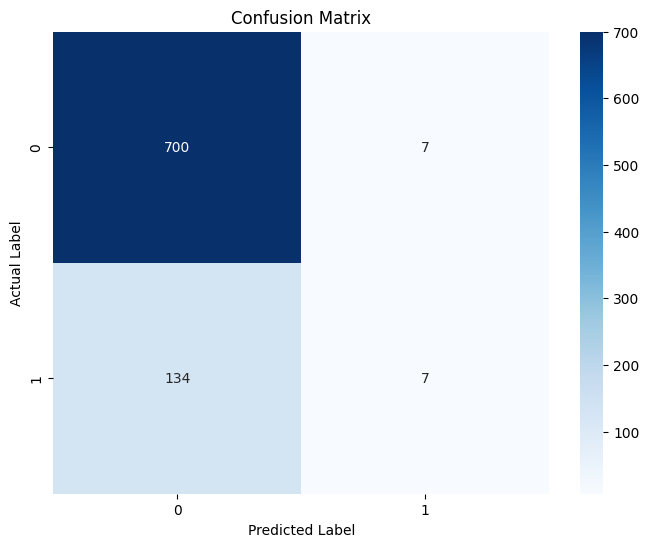

In [44]:
cmm = confusion_matrix(y_test,pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cmm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [45]:
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': stats.loguniform(1e-3, 1e2),   # random continuous sampling
    'solver': ['liblinear', 'saga'],
    'max_iter': [500],
    'class_weight': ['balanced', None],
    'l1_ratio': [0.1, 0.5, 0.9]  # only matters if elasticnet
}

reg2 = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_dist,
    n_iter=30,   # number of random samples
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

reg2.fit(x_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x795f60bf85c0>,
                                        'class_weight': ['balanced', None],
                                        'l1_ratio': [0.1, 0.5, 0.9],
                                        'max_iter': [500],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, verbose=1)

In [46]:
reg2.best_score_ #wow

np.float64(0.8533923303834807)

In [47]:
reg2.best_params_

{'C': np.float64(0.09984006580328653),
 'class_weight': None,
 'l1_ratio': 0.9,
 'max_iter': 500,
 'penalty': 'l2',
 'solver': 'saga'}

Lets drop some more columns

In [48]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=7)  # choose top 10 features
X_new = selector.fit_transform(x, y)

print("Selected Features Indexes:", selector.get_support(indices=True))
selected_indexes = selector.get_support(indices=True)

Selected Features Indexes: [ 1  4  7  9 10 11 14]


In [49]:
x_selected = x.iloc[:, selected_indexes]
print("Final Columns Shape:", x_selected.shape)

Final Columns Shape: (4238, 7)


In [50]:
x_train,x_test,y_train,y_test = train_test_split(x_selected,y,test_size=0.2,random_state=2)

In [51]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
pred3 = lg.predict(x_test)

In [53]:
#accuracy_score(y_test,pree) #slightly more better

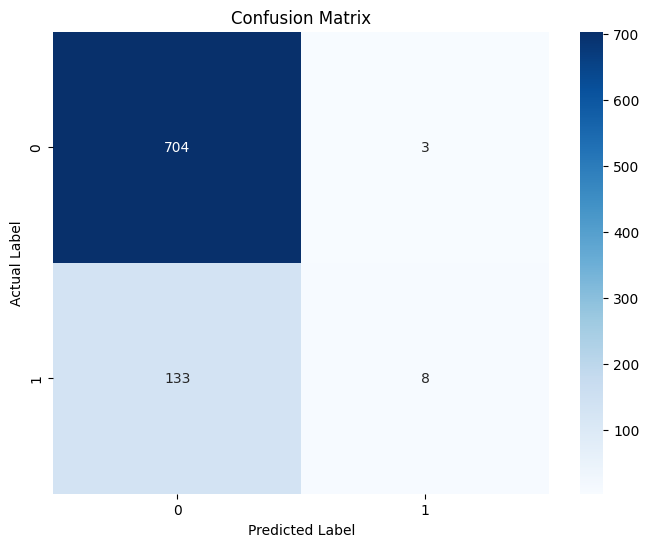

In [54]:
cmmm = confusion_matrix(y_test,pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(cmmm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [55]:
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': stats.loguniform(1e-3, 1e2),   # random continuous sampling
    'solver': ['liblinear', 'saga'],
    'max_iter': [500],
    'class_weight': ['balanced', None],
    'l1_ratio': [0.1, 0.5, 0.9]  # only matters if elasticnet
}

reg3 = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_dist,
    n_iter=30,   # number of random samples
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

reg3.fit(x_train, y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x795f62971d00>,
                                        'class_weight': ['balanced', None],
                                        'l1_ratio': [0.1, 0.5, 0.9],
                                        'max_iter': [500],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, verbose=1)

In [56]:
reg3.best_score_

np.float64(0.8530973451327434)

In [57]:
reg3.best_params_

{'C': np.float64(0.09984006580328653),
 'class_weight': None,
 'l1_ratio': 0.9,
 'max_iter': 500,
 'penalty': 'l2',
 'solver': 'saga'}

<h2> Lets try ginging weight as data is immabalanced